<a href="https://colab.research.google.com/github/cu-applied-math/SciML-Class/blob/main/Labs/lab01_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Lab 1 benchmarking script for SciML class
import torch
import torch.utils.benchmark as benchmark
import numpy as np
from matplotlib import pyplot as plt

import platform, subprocess, sys
if platform.system() == 'Windows':
  print('Windows')
else:
  print( platform.system())  # "Darwin" = Mac
  print(platform.processor())
 # print(subprocess.run(['cat', '/proc/cpuinfo'], stdout=subprocess.PIPE).stdout.decode('utf-8')) # lengthy output
hostname = platform.node()
print('hostname of the computer is:', hostname)

Linux
x86_64
hostname of the computer is: ef71fab15f77


In [5]:
print("Torch version is", torch.__version__)
print("Numpy version is", np.__version__)
print("Python version is", sys.version)
# np.show_config() # not always accurate, and very lengthy output

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# If you have more than one thread, you can try benchmarking with all your threads,
# and then try with just one thread (to do so, uncomment this line:)
#torch.set_num_threads(1)

num_threads = torch.get_num_threads()
print(f"Number of threads: {num_threads}")

Torch version is 2.4.0+cu121
Numpy version is 1.26.4
Python version is 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Using cpu device
Number of threads: 1


In [15]:
nReps = 10

nList = np.logspace(2, 3.8, 15, dtype=int)
times = np.zeros(len(nList))

for i,n in enumerate(nList):

  A = torch.randn(n, n, device=device)
  B = torch.randn(n, n, device=device)

  # Following tutorial at https://pytorch.org/tutorials/recipes/recipes/benchmark.html
  t = benchmark.Timer(
      stmt="torch.matmul(A, B)",
      setup="import torch",
      num_threads=num_threads,
      globals={"A": A, "B": B},
  )
  results = t.timeit(nReps)
  #print(results)
  times[i] = results.mean
  print(f"i is {i+1:2d} of {len(nList)}, n = {n:5d}, time = {times[i]:.3e}")


i is  0 of 15, n =   100, time = 7.087e-05
i is  1 of 15, n =   127, time = 2.230e-04
i is  2 of 15, n =   163, time = 1.777e-04
i is  3 of 15, n =   209, time = 3.246e-04
i is  4 of 15, n =   268, time = 6.267e-04
i is  5 of 15, n =   343, time = 1.592e-03
i is  6 of 15, n =   439, time = 2.800e-03
i is  7 of 15, n =   562, time = 6.170e-03
i is  8 of 15, n =   719, time = 1.241e-02
i is  9 of 15, n =   921, time = 2.488e-02
i is 10 of 15, n =  1178, time = 5.150e-02
i is 11 of 15, n =  1508, time = 1.036e-01
i is 12 of 15, n =  1930, time = 2.160e-01
i is 13 of 15, n =  2470, time = 5.319e-01
i is 14 of 15, n =  3162, time = 9.842e-01


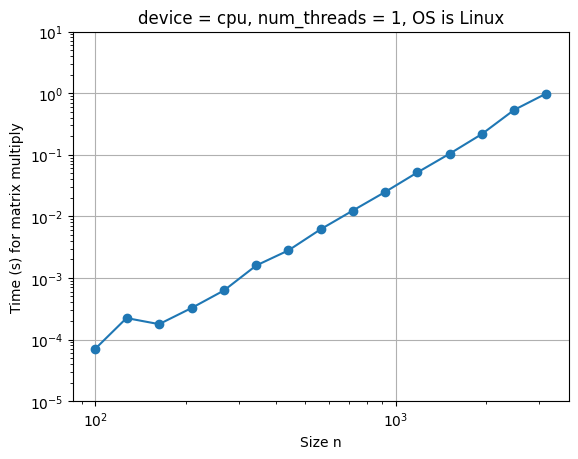

In [21]:
plt.loglog(nList,times,'o-')
plt.xlabel('Size n')
plt.ylabel('Time (s) for matrix multiply')
str = f'device = {device}, num_threads = {num_threads}, OS is {platform.system()}'
plt.title(str)
plt.grid()
plt.ylim( [1e-5, 10] ) # make it consistent
plt.savefig(f'lab01_matmul_time_{hostname}.pdf') # PDFs preferred over PNG since they embod fonts rather than rasterize them
# plt.show()